# Дерево решений для построения классификации или регрессии биолого-медицинских данных

**Дерево решений** - это модель, которая помогает принимать решения, задавая последовательность простых вопросов. Каждый вопрос - это проверка какого-то признака (например, симптома или результата анализа).

Как работает дерево решений?
1. Начинаем с корня - первого вопроса. Например: «Есть ли у пациента высокая температура?»

2. В зависимости от ответа идём по ветвям:

    * если «да» - переходим к следующему вопросу, связанному с высокой температурой;

    * если «нет» - идём по другой ветке, где рассматриваем другие признаки.

3. Повторяем вопросы, пока не придём к ответу.В конце пути - лист дерева, где указано решение: диагноз, прогноз или рекомендация.

Почему это удобно?
1. Понятно и прозрачно. Каждый шаг - простой вопрос, который легко объяснить врачу и пациенту.

2. Легко интерпретировать. Можно проследить, почему модель приняла именно такое решение.

3. Работает с разными типами данных. Например, с анализами крови, симптомами, результатами обследований.

Дерево решений - это как пошаговый план вопросов, который помогает быстро и понятно принять правильное медицинское решение. Это простой и мощный инструмент, который часто используют в медицине для диагностики и прогнозирования.

                           Температура > 38°C?
                             /                \
                          Да                   Нет
                         /                       \
                     Есть кашель?             Диагноз: нет инфекции
                       /           \
                     Да             Нет
                    /                \
            Возраст > 60?         Диагноз: простуда
                /          \
              Да            Нет
             /               \
      Диагноз: грипп     Диагноз: ОРВИ





Первое правило, то есть вершина, с которой всё начинается, называется корневым узлом.

Ячейка со вторым правилом называется просто узлом, или узлом принятия решений (внутренним узлом). Корневой узел — тоже узел принятия решений.

Узел, в котором правил нет, называется конечным узлом, или листом. 

Также у дерева решений есть глубина — это количество уровней с узлами, в которых есть правила.

Рассмотрим работу модели на медицинском наборе данных, содержащем диагностические параметры 768 женщин из племени Пима (Аризона, США), собранные для прогнозирования диабета.

Признаки:
* Pregnancies:  количество беременностей (единственный немедицинский параметр, но значим для гормонального фона);
* Glucose:  концентрация глюкозы через 2 часа после перорального теста (OGTT);
* BloodPressure:  диастолическое артериальное давление (мм рт.ст.) ;
* SkinThickness: толщина кожной складки трицепса (мм), измерено кавернером с фиксированным давлением 10 г/мм²;
* Insulin: сывороточный инсулин через 2 часа (мкЕд/мл), показатель инсулинорезистентности;
* BMI: индекс массы тела, вес, (кг) / рост² (м);
* DiabetesPedigreeFunction: генетическая предрасположенность (расчетный параметр), учитывает диабет у родственников 1-2 степени;
* Age: возраст пациентки (годы);
* Outcome: наличие диабета (диагноз через 5 лет после наблюдения), 0 – отсутствие, 1 – наличие.

In [1]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,169.5,33.6,0.627,50,1
1,1,85,66.0,29,102.5,26.6,0.351,31,0
2,8,183,64.0,32,169.5,23.3,0.672,32,1
3,1,89,66.0,23,94.0,28.1,0.167,21,0
4,0,137,40.0,35,168.0,43.1,2.288,33,1


Подготовим данные для построения моделей:
- разделим признаки на входные и целевой;
- разделим выборку на обучающую, валидационную и тестовую в соотношении 60%, 20% и 20%.

In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
RANDOM_STATE=4

X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=RANDOM_STATE, 
                                                  stratify=y_train) 

Модель дерева решений в `scikit-learn` реализована классом `DecisionTreeClassifier` для задач классификации и `DecisionTreeRegressor` для регрессии.

Важно при построении дерева зафиксировать параметр `random_state` для контроля случайности, которая присутствует в некоторых этапах построения дерева. В противном случае результаты будут невоспроизводимы и при каждом запуске обучения дерево может строиться немного по-разному, что приведёт к разным предсказаниям и метрикам.

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=RANDOM_STATE)
model.fit(X_train, y_train) 


# Прогнозирование на тестовой выборке
y_pred = model.predict(X_val)

# Оценка точности модели
accuracy = accuracy_score(y_val, y_pred)
print(f"Точность модели KNN: {accuracy:.2%}")

Точность модели KNN: 83.12%


Для визуализации дерева решений в `scikit-learn` можно использовать встроенную функцию `plot_tree` из модуля `sklearn.tree`.

Параметры функции `plot_tree`:
* decision_tree - обученное дерево решений (обязательный параметр);
* max_depth - максимальная глубина дерева для отображения;
* feature_names - список имён признаков;
* class_names - список имён классов;
* label - что отображать в узлах ("all", "root", "none");
* filled - закрашивать ли узлы цветом;
* impurity - отображать ли показатель неопределённости;
* node_ids - отображать ли идентификаторы узлов;
* proportion - использовать ли пропорции образцов для размеров узлов;
* rotate - повернуть дерево на 90 градусов;
* rounded - закруглять ли углы узлов;
* precision - количество знаков после запятой для числовых значений;
* ax - matplotlib ось для рисования;
* fontsize - размер шрифта.

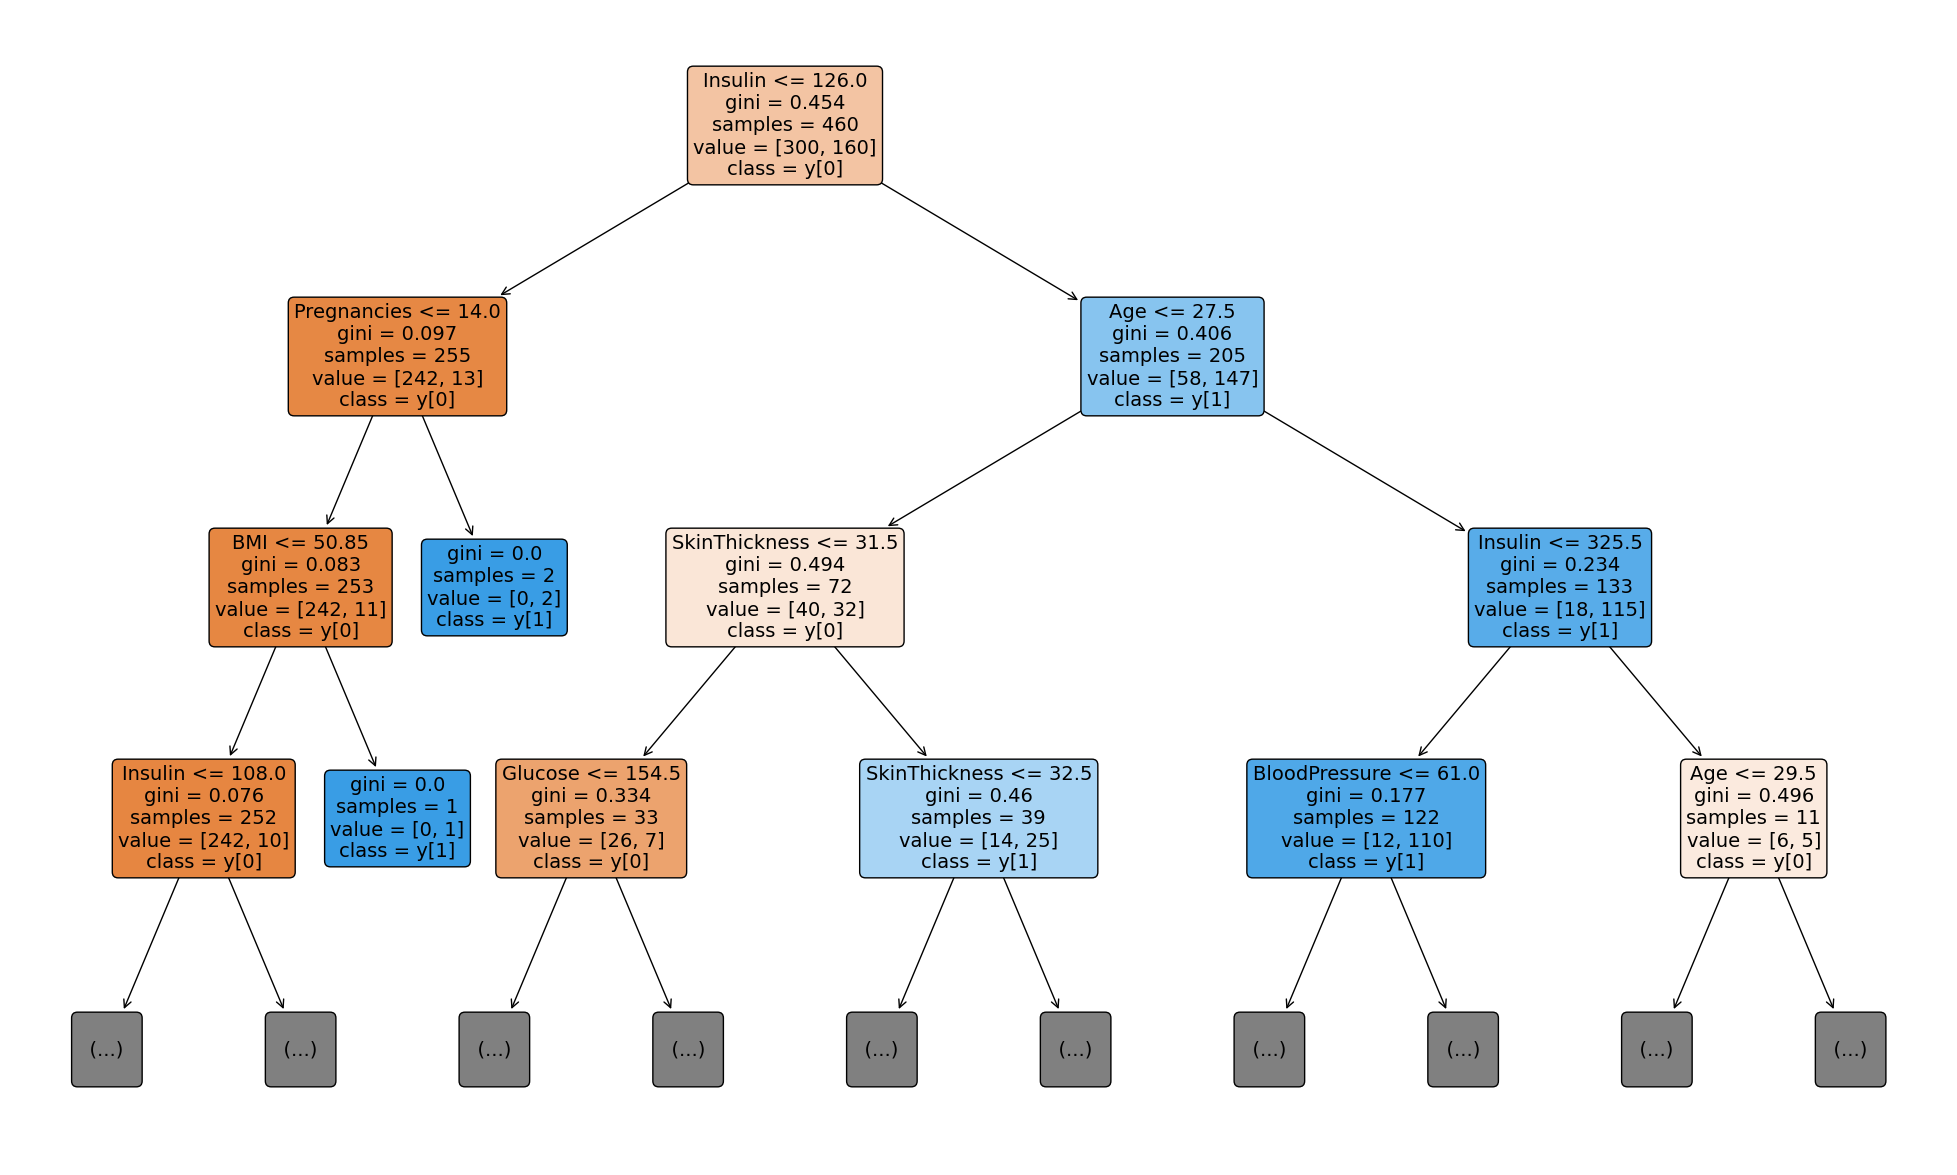

In [4]:
from sklearn.tree import plot_tree 
import matplotlib.pyplot as plt

plt.figure(figsize=(25,15))
plot_tree(decision_tree=model, feature_names=df.columns, filled=True, fontsize=14, rounded=True, max_depth=3, class_names=True);

В узлах дерева, визуализируемого функцией `plot_tree` из `scikit-learn`, по умолчанию выводится следующая информация:

1. Условие разбиения (например, feature_name <= threshold) - правило, по которому происходит разделение данных в данном узле.
2. Мера нечистоты (impurity) - значение критерия качества разбиения (например, индекс Джини или энтропия) в данном узле. Она оценивает, насколько «чистым» или однородным является множество объектов в узле дерева решений. Чем ниже нечистота, тем более однороден узел по классам. Если эта мера равна 0, то все объекты одного класса (узел чистый). Наиболее часто используемые меры:
     * индекс Джини (Gini impurity) - показывает вероятность ошибочной классификации случайно выбранного объекта из узла (мера по умолчанию): $G = 1 - \sum_{i=1}^{C} p_i^2$, $C$ - число классов, $p_i$ - доля объектов класса $i$ в узле;
     * энтропия - измеряет степень неопределённости или хаоса в узле: $H = - \sum_{i=1}^{C} p_i \log_2 p_i$.
3. Количество образцов (samples) - число объектов из обучающей выборки, попавших в этот узел (с учётом весов, если они есть).
4. Распределение классов (values) - сколько объектов каждого класса находится в узле.
5. предсказанный класс для данного узла (class) - это класс, к которому принадлежит большинство объектов, попавших в этот узел.

Если включён параметр filled=True, узлы дополнительно окрашиваются в цвета, отражающие преобладающий класс (для классификации) или значение (для регрессии).

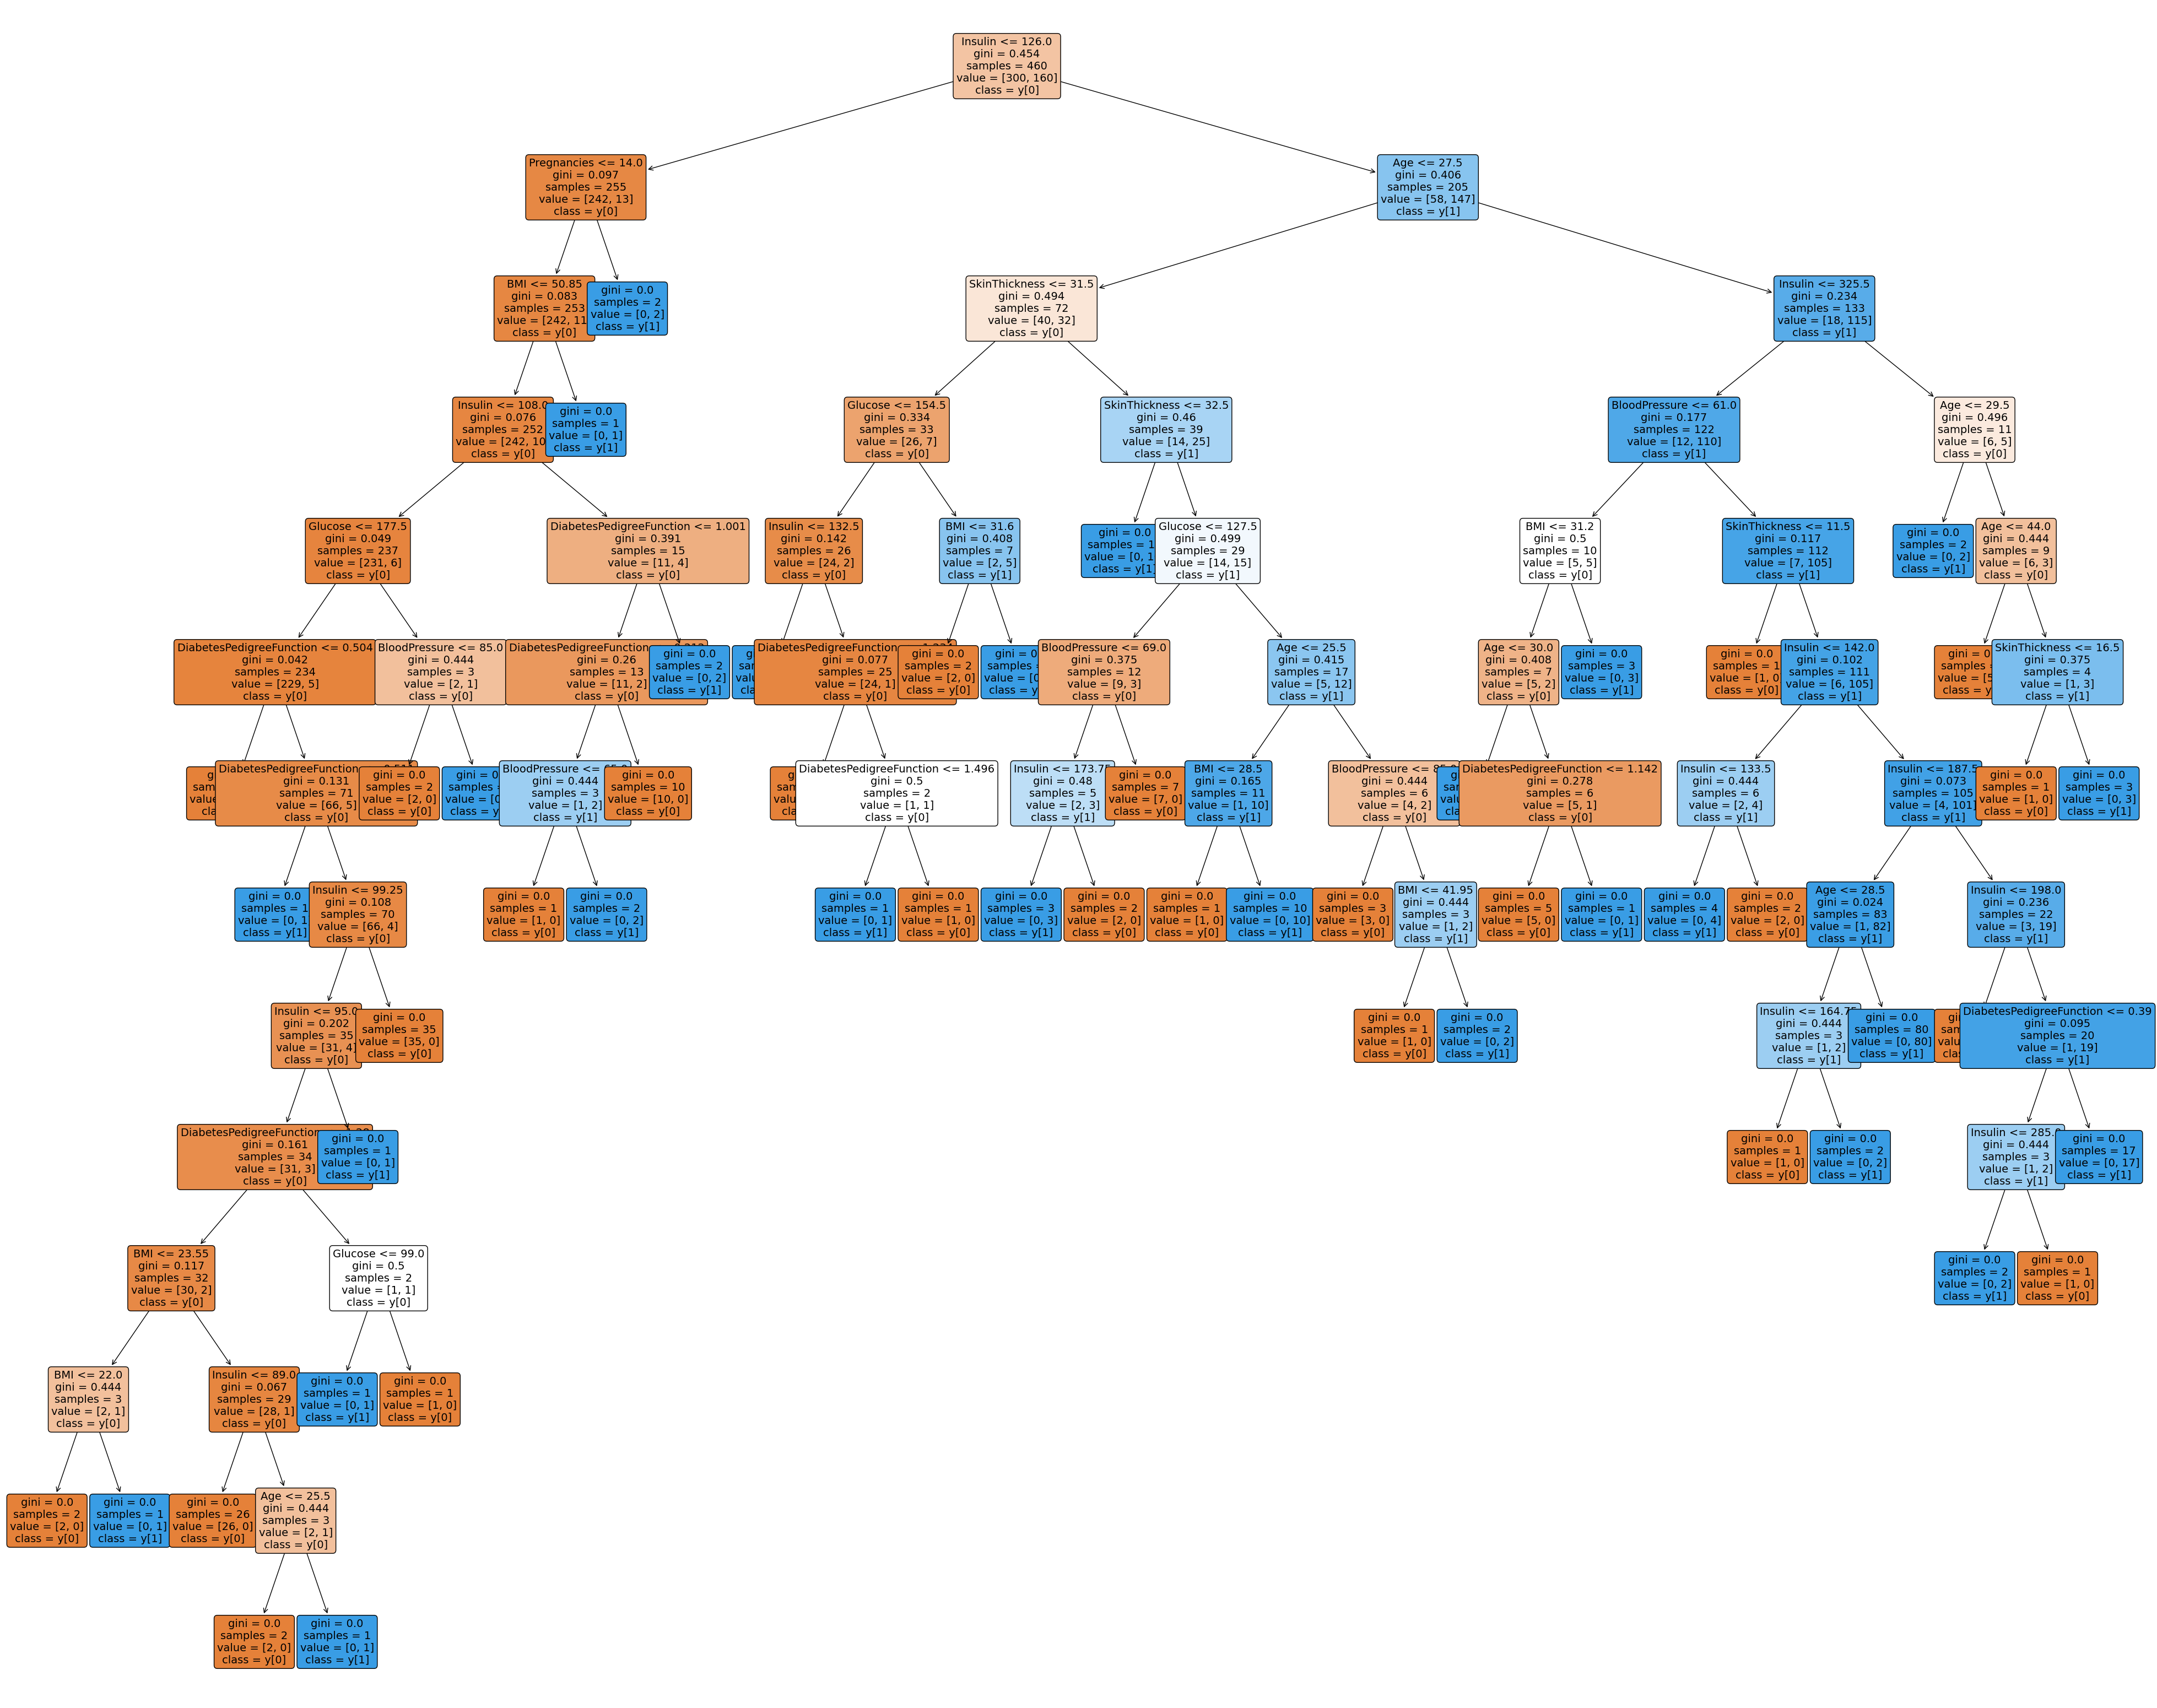

In [5]:
plt.figure(figsize=(50,40))
plot_tree(decision_tree=model, feature_names=df.columns, filled=True, fontsize=14, rounded=True, class_names=True);

Поэкспериментируейте самомстоятельно с параметрами отоюражений дерева решений.

Функция `export_text` из `sklearn.tree` позволяет получить текстовое представление правил, по которым построено дерево решений.

Основные параметры:
* decision_tree - обученный объект дерева (DecisionTreeClassifier или DecisionTreeRegressor);
* feature_names - список имён признаков (по умолчанию используются generic: feature_0, feature_1 и т.д.);
* class_names - список имён классов (для классификации);
* max_depth - максимальная глубина выводимых правил (по умолчанию 10);
* spacing - количество пробелов между уровнями вложенности (по умолчанию 3);
* decimals - количество знаков после запятой для числовых значений (по умолчанию 2);
* show_weights - показывать ли количество объектов каждого класса в листьях (по умолчанию False).

In [6]:
from sklearn.tree import export_text

text_representation = export_text(
    model,
    feature_names=list(X_train.columns),
    #max_depth=3
)
print(text_representation) 

|--- Insulin <= 126.00
|   |--- Pregnancies <= 14.00
|   |   |--- BMI <= 50.85
|   |   |   |--- Insulin <= 108.00
|   |   |   |   |--- Glucose <= 177.50
|   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- DiabetesPedigreeFunction >  0.50
|   |   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.51
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- DiabetesPedigreeFunction >  0.51
|   |   |   |   |   |   |   |--- Insulin <= 99.25
|   |   |   |   |   |   |   |   |--- Insulin <= 95.00
|   |   |   |   |   |   |   |   |   |--- DiabetesPedigreeFunction <= 1.28
|   |   |   |   |   |   |   |   |   |   |--- BMI <= 23.55
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- BMI >  23.55
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- DiabetesPedigreeFunction >  1.28
|   |

В `DecisionTreeClassifier` из `scikit-learn` важность признаков можно получить после обучения модели через атрибут `feature_importances_`. Она вычисляется на основе того, насколько каждый признак улучшает качество разбиения дерева.

Как считается `feature_importances_` в деревьях решений:
1. При построении дерева на каждом узле выбирается признак и порог, которые максимально уменьшают неопределённость (например, индекс Джини или энтропию).
2. Важность признака - это сумма уменьшений критерия качества (например, уменьшение индекса Джини), которые были достигнуты благодаря разбиениям по этому признаку, взвешенная по числу объектов, попавших в узлы.
3. Итоговая важность признака - это нормализованная сумма таких улучшений по всему дереву.

Значение `feature_importances_` - это число от 0 до 1, показывающее относительный вклад признака. Чем выше значение - тем важнее признак для модели. Признаки, которые не использовались для разбиений, имеют важность 0.

In [7]:
feature_importances = pd.DataFrame(
    {
        'Feature': X_train.columns,
        'Importance': model.feature_importances_
    }) 
feature_importances.sort_values('Importance', ascending=False)

,Feature,Importance
4,Insulin,0.591783
7,Age,0.125503
3,SkinThickness,0.063807
5,BMI,0.056578
6,DiabetesPedigreeFunction,0.055826
2,BloodPressure,0.046069
1,Glucose,0.043036
0,Pregnancies,0.017399


Чтобы улучшить качество, будем экспериментировать с гиперпараметрами `max_depth`, `min_samples_split`, `min_samples_leaf` — они больше всего влияют на построение дерева решений. 

Гиперпараметр `max_depth` фиксирует количество уровней с правилами. В модели с базовыми настройками этот параметр равен None. Это значит, что глубина дерева может быть какой угодно, из-за чего модель переобучается. Если зададим этот гиперпараметр целым числом, ниже этого уровня дерево строиться не будет.

Гиперпараметр `min_samples_split` показывает, сколько объектов должно быть в узле, чтобы они разделились на классы. Если их меньше указанного числа, то разделения на классы не будет. Значение гиперпараметра по умолчанию — 2. Если в узле два объекта — они могут разделиться ещё на два узла. В таком случае может происходить так называемая подгонка, когда модель слишком сильно подстраивается под тренировочную выборку.

Гиперпараметр `min_samples_leaf` отвечает за количество объектов в одном листе. Значение по умолчанию — 1. Так в листе сможет находиться всего один объект. Этим значением можно управлять: если сделаем его больше, листы не будут формироваться, если в них попадёт недостаточное число объектов.

In [8]:
model1 = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth = 4, min_samples_split = 15, min_samples_leaf = 7, 
                                class_weight='balanced')
model1.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight='balanced', max_depth=4, min_samples_leaf=7,
                       min_samples_split=15, random_state=4)

In [9]:
y_pred = model1.predict(X_val)

# Оценка точности модели
accuracy = accuracy_score(y_val, y_pred)
print(f"Точность модели: {accuracy:.2%}")

Точность модели: 79.87%


Точность немного упала, но интепретируемость стала лучше, так как глубина дерева решений всего 4.

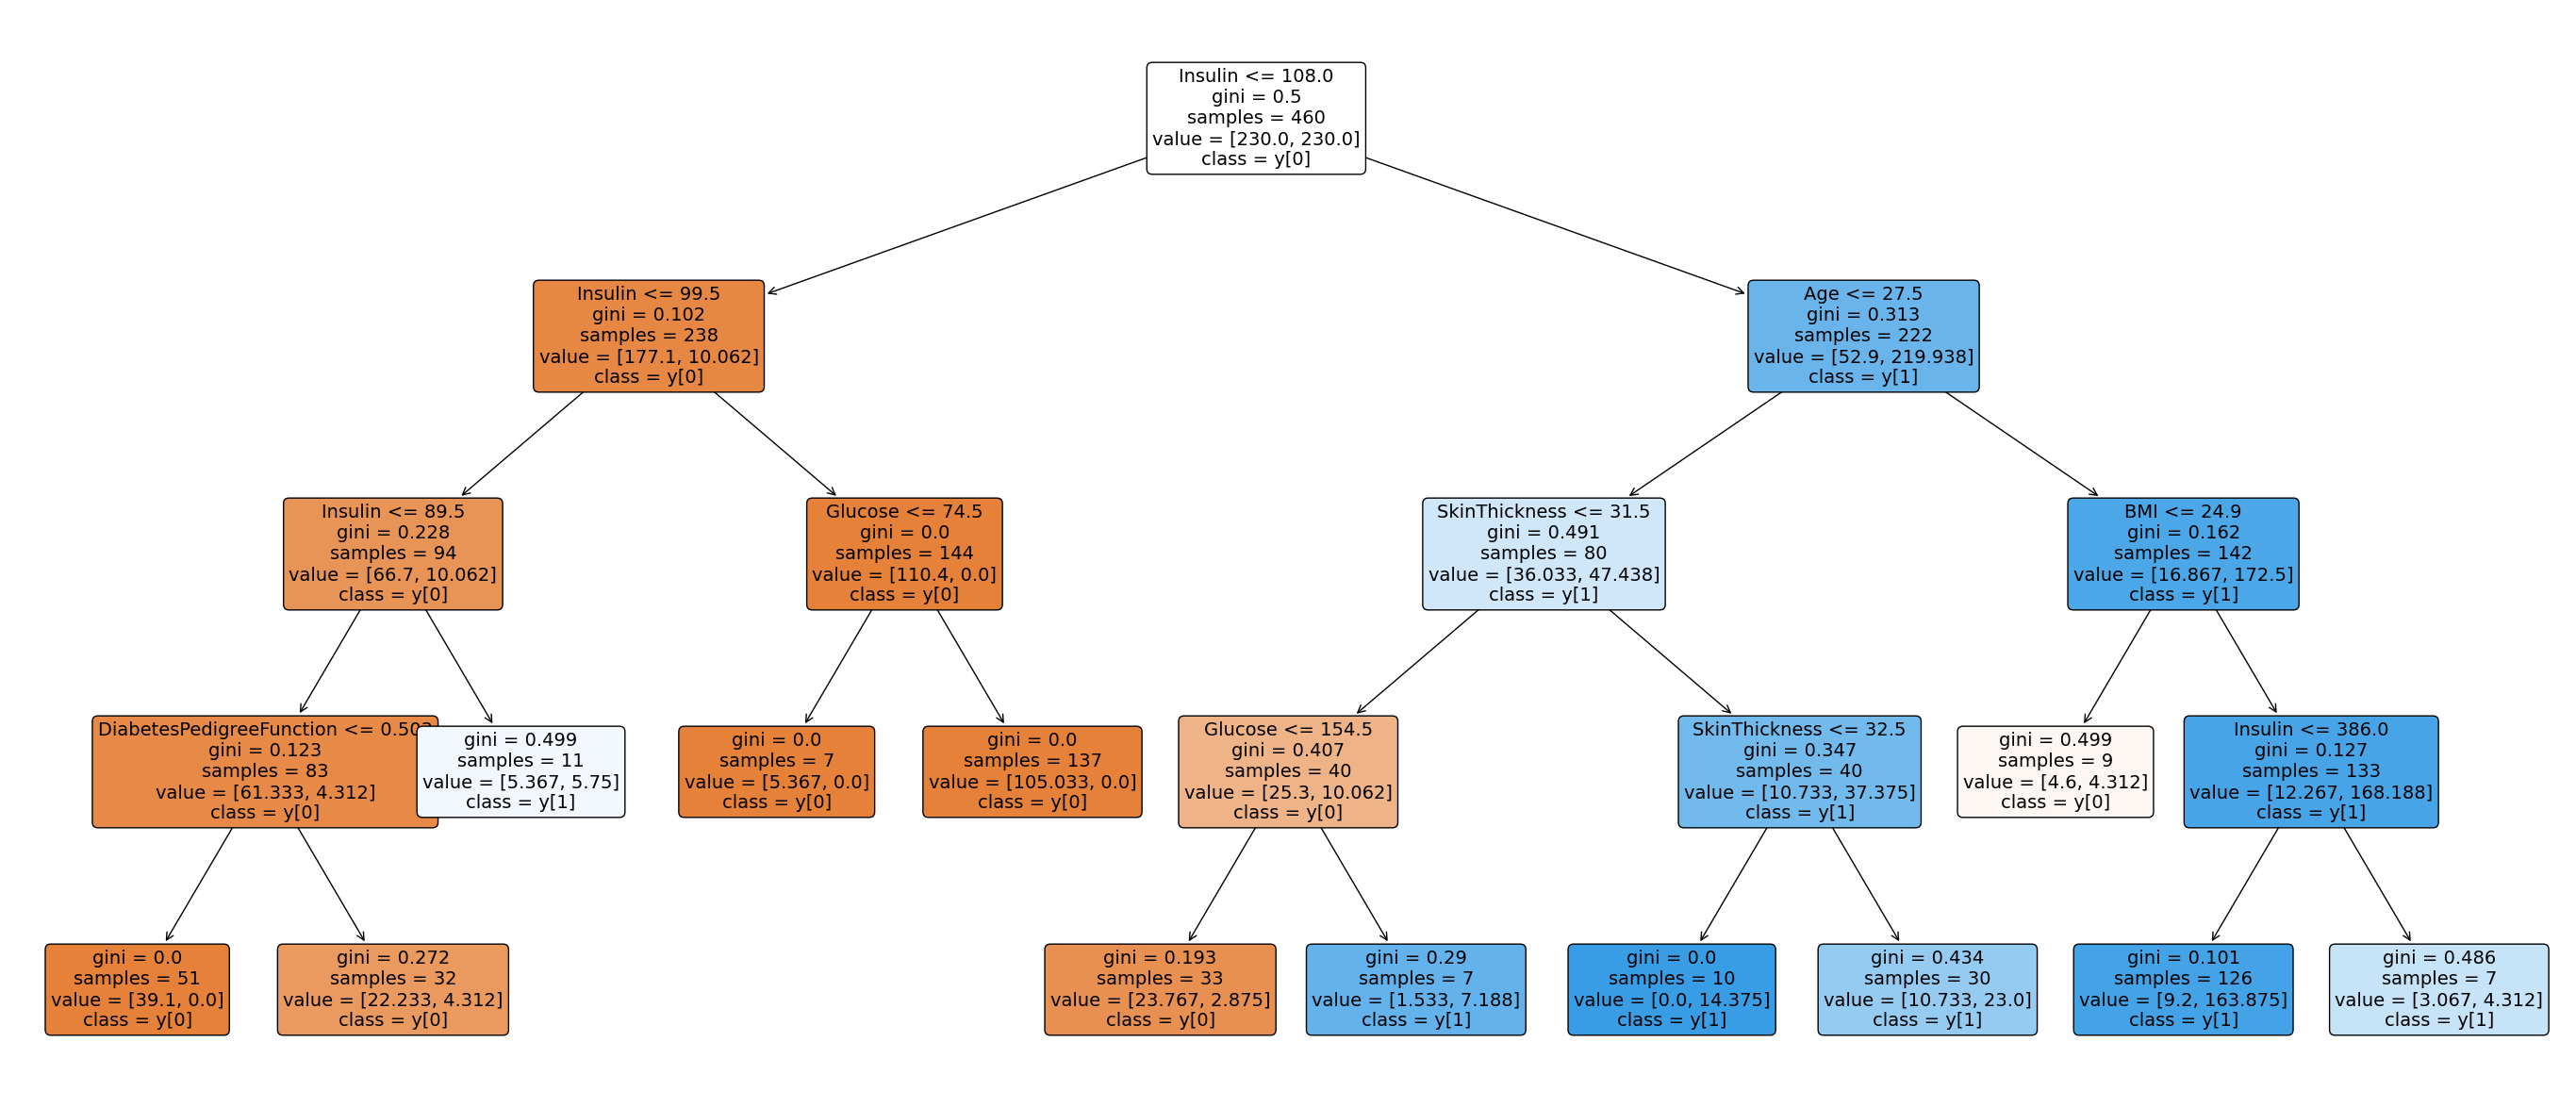

In [10]:
plt.figure(figsize=(35,15))
plot_tree(decision_tree=model1, feature_names=df.columns, filled=True, fontsize=14, rounded=True, class_names=True);

Финальная оценка точности модели на тестовой выборке.

In [11]:
y_pred = model1.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2%}")

Точность модели: 81.17%


***Зачетное задание по теме***

Во втором практическом занятии 3-го модуля в качестве зачетного задания по теме была предложена задача бинарной  классификации определения доброкачественности (`benign`) или злокачественности (`malignant`) опухоли груди на основе данных, полученных из изображений, созданных при помощи тонкоигольной аспирационной биопсии (FNA) опухоли груди (файл `BreastCanser.csv`). Постройте модель решающего дерева. Для этого:

1. Загрузите данные.
2. Проведите предварительную подготовку:
    - разделите признаки на входные и целевой;
    - разделите выборку на обучающую, валидационную и тестовую в соотношении 60%, 20% и 20%.
3. Постройте модель решающего дерева для классификации опухоли, оцените её качество на валидационной выборке при помощи метрик `Presicion` и `Recall`.
4. Варьируя гиперпараметрами `max_depth`, `min_samples_split`, `min_samples_leaf` добейтесь максимального качества модели на валидационной выборке.
5. Оцените качество модели на тестовой выборке. Сделайте выводы.

In [1]:

# в этой ячейке должен быть Ваш код
# 1. Импорт библиотек
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score


In [2]:
# 2. Загрузка данных
df = pd.read_csv('BreastCanser.csv')
# Преобразуем целевой признак: 'B' -> 0, 'M' -> 1
df['diagnosis'] = df['diagnosis'].map({'B':0, 'M':1})

# Удалим лишние колонки, если есть
df.drop(columns=['id', 'Unnamed: 32'], errors='ignore', inplace=True)


In [3]:
# 3. Разделение признаков и целевого признака
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


In [4]:
# 4. Разделение на обучающую (60%), валидационную (20%) и тестовую (20%) выборки с стратификацией
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)  # 0.25*0.8=0.2


In [5]:
# 5. Построение базовой модели решающего дерева
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_val_pred = dt.predict(X_val)
print(f"Базовая модель - Precision: {precision_score(y_val, y_val_pred):.4f}")
print(f"Базовая модель - Recall: {recall_score(y_val, y_val_pred):.4f}")


Базовая модель - Precision: 0.8478
Базовая модель - Recall: 0.9070


In [6]:
# 6. Подбор гиперпараметров max_depth, min_samples_split, min_samples_leaf с помощью GridSearchCV
param_grid = {
    'max_depth': range(2, 15),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10)
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='precision', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Лучшие гиперпараметры:", grid_search.best_params_)


Лучшие гиперпараметры: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [7]:
# 7. Оценка лучшей модели на валидационной выборке
best_dt = grid_search.best_estimator_
y_val_pred_best = best_dt.predict(X_val)
print(f"Оптимизированная модель - Precision: {precision_score(y_val, y_val_pred_best):.4f}")
print(f"Оптимизированная модель - Recall: {recall_score(y_val, y_val_pred_best):.4f}")


Оптимизированная модель - Precision: 0.9048
Оптимизированная модель - Recall: 0.8837


In [8]:
# 8. Оценка модели на тестовой выборке
y_test_pred = best_dt.predict(X_test)
print(f"Тестовая выборка - Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"Тестовая выборка - Recall: {recall_score(y_test, y_test_pred):.4f}")


Тестовая выборка - Precision: 0.9211
Тестовая выборка - Recall: 0.8333


In [10]:
# 9. Выводы
print("Оптимизированное решающее дерево показывает улучшение качества по сравнению с базовой моделью.")


Оптимизированное решающее дерево показывает улучшение качества по сравнению с базовой моделью.
